# CLASSIFICATION D'IMAGES : Base de données MNIST


# Importation des bibliothèques

In [2]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

## Importation des données MNIST
Les données sont disponibles dans les datasets de sklearn 
On peut les recupérer avec la fonction fetch_openml

In [3]:
from sklearn.datasets import fetch_openml

# Récupération des Images
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [4]:
#on a un attribut label et un attribut target dans le jeu de donné
X, y = mnist.data, mnist.target
print(X)
print(y)
print(X.shape)
print(y.shape)

# x contient n listes correspondant aux n images, contenant chacune les pixels de chaque images
# y contient n labels 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']
(70000, 784)
(70000,)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  21 135 255 189 106  13   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  21 166 254 254 254 254 184  10   0   0   

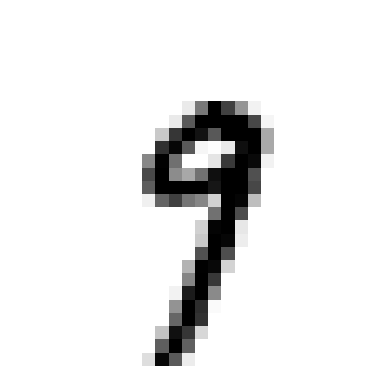

In [5]:

numero_image = 133
print (X[numero_image])
image = X[numero_image].reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()

#cmap="binary" permet d'voir un eimage en niveau de gris plutot qu'n couleur 
#X[numero_image].reshape(28, 28) on fait une image a partir d'une liste de chiffres entre 0 et 254 
#plt.imshow(image, cmap="binary") :> pas besoin d'un x et d'un y, on a une liste de chiffres qui correspondent aux pixels


In [6]:
# Affichage du label associé
print(y[numero_image])

9


## Création des datasets
Création des datasets d'entraintement (X_train, y_train) et de test (X_test, y_test). Par exemple, les 60000 premières images serviront à l'entrainement et les autres au test.

In [7]:
# on peut Créez les datasets : X_train, X_test, y_train et y_test de deux manières différentes : manuellement
# ou via train_test_split
X, y = mnist.data, mnist.target
import sklearn.model_selection

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#on peut faire les deux methodes précédentes mais la 2 eme me parait mieux

# 1. Classification binaire

## Modification des datasets
On commence par la classification binaire.

In [8]:
#  création y_train5 et y_test5 pour voir binaire ( 0 si differnet de 5, 1 si ==5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
print(y_test_5)

[False False False ... False False False]


## Entrainement : modèle de régression logistique
Scikit Learn => fonction de classifieur linéaire très performante pour les gros datasets avec mise en oeuvre de la descente du gradient stochastique : SGDClassifier 
méthode de régression logistique (mais on peut en utiliser d'autres)

In [9]:
from sklearn.linear_model import SGDClassifier

# on utilise sgd_clf et on lre fit aux données pour voir si uner image est un 5 ou non
sgd_clf = SGDClassifier(loss='log_loss',random_state=42)
sgd_clf.fit(X_train, y_train_5) 
print(sgd_clf.predict(X_train[numero_image].reshape(1, -1)))
print(sgd_clf.predict_proba(X_train[numero_image].reshape(1, -1))) #probabilitéque ce soit FAUX (1) ou vrai (0)
print(sgd_clf.decision_function(X_train[numero_image].reshape(1, -1))) # tres loin de la valeur de décision donc on est sure de soi

[False]
[[1. 0.]]
[-4495.80035077]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# on utilise sgd_clf et on lre fit aux données pour voir si uner image est un 5 ou non
rd_forest = RandomForestClassifier()
rd_forest.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
print(rd_forest.predict(X_train[numero_image].reshape(1, -1)))
print(rd_forest.predict_proba(X_train[numero_image].reshape(1, -1)))

['8']
[[0.   0.03 0.02 0.   0.02 0.   0.01 0.01 0.85 0.06]]


## Evalution de la performance : Taux d'erreur (accuracy)


In [12]:
from sklearn.metrics import accuracy_score

# #.  on va évaluer le taux d'erreur sur le dataset d'entainement et le dataset de test

y_hat_train_5 = sgd_clf.predict(X_train)#prediction
accuracy_train = accuracy_score(y_train_5, y_hat_train_5)#supposé vs réel ???
print(accuracy_train)
y_hat_5 = sgd_clf.predict(X_test)
accuracy = accuracy_score(y_test_5, y_hat_5)
print(accuracy)

#on a des supers scores mais en gros on aiurait  deja de bons scores si on disait toujours que c'etaient pas des 5

0.9671428571428572
0.9649285714285715


## Evalution de la performance : Matrice de Confusion

In [13]:
from sklearn.metrics import confusion_matrix

# vrais negatifs      faux négatifq 
# faux positifs       vrais positifs

# Question 7 : calculez et affichez la matrice de confusion
matrice_confusion = confusion_matrix(y_test_5, y_hat_5)
print(matrice_confusion)

[[12516   211]
 [  280   993]]


## Evalution de la performance : Precision et Rappel

In [14]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test_5, y_hat_5)  
rappel = recall_score(y_test_5, y_hat_5)
print(precision)
print(rappel)

0.824750830564784
0.7800471327572663


## Compromis Precision/Rappel

In [15]:
# Par défaut, la régression logistique avec SGDClassifier considère que si le score est négatif,respectivement positif, l'individu appartient à la classe "false", respectivement "true".
# Le seuil est donc zéro. 

seuil = 0
y_scores = sgd_clf.decision_function(X_test)
y_pred = (y_scores > seuil)
predictions_correctes = y_pred == y_test_5
print(sum(predictions_correctes))

13509


## Courbe PRECISION-RAPPEL

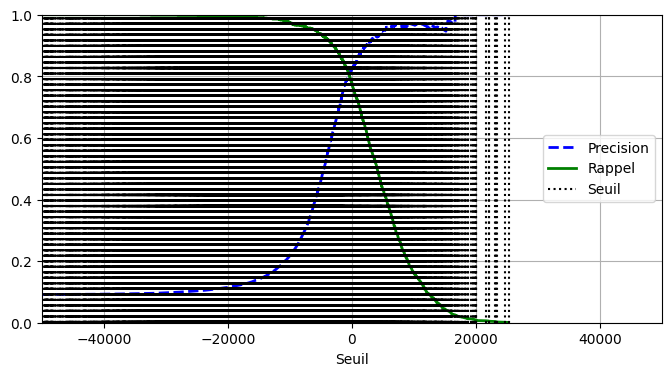

In [17]:
# La fonction precision_recall_curve calcule la precision et le rappel pour différents seuils
# possible de tracer l'évolution des la  précision (taux des faux positifs / ( vrais négatifs + faux positifs )) et du rappel (taux des vrais positifs / ( vrais positifs + faux négaitfs  en fonction du seuil

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Rappel", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="Seuil")

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Seuil")
plt.legend(loc="center right")
plt.show()

## Courbe ROC


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


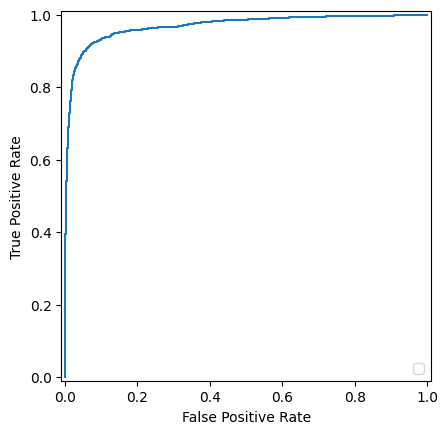

In [18]:
# courbe roc :  axe x => taux des faux positifs / ( vrais négatifs + faux positifs )   axe y => taux des vrais positifs / ( vrais positifs + faux négaitfs )

from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [19]:
# Calcul AUC
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test_5, y_scores)
print(AUC)

0.9687703048692308


# 2. Classification Multi-classes

In [20]:
# entrainez un classifieur multi-classes avec le même algorithme rend automatiquement le bon resultat;
 
sgd_clf_MC = SGDClassifier(loss='log_loss',random_state=42)
sgd_clf_MC.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [21]:
y_hat_MC = sgd_clf_MC.predict(X_test)
accuracy_MC = accuracy_score(y_test, y_hat_MC)
print(accuracy_MC)

0.8685714285714285


In [22]:
matrice_confusion_MC = confusion_matrix(y_test, y_hat_MC)
print(matrice_confusion_MC)


[[1289    1    3    8    0    6   18    5    7    6]
 [   0 1567    1   13    2    2    4    3    6    2]
 [   8   29 1043  131   13    9   67   37   32   11]
 [   0    8    8 1343    1   11   13   14   11   24]
 [   2    6    3    8 1112    5   24   13   17  105]
 [   9    7    2  190   15  865   82   11   41   51]
 [   3    4    3    1    3   10 1361    8    3    0]
 [   6    7   10   12    4    2    0 1389    2   71]
 [   7   42    3  184    8   38   38   22  939   76]
 [   5    6    2   37   22    0    0   86   10 1252]]
